In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import joblib as jb
from joblib import dump, load
from scipy import stats
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import median_absolute_deviation
from sklearn.model_selection import RandomizedSearchCV

In [2]:
ff = pd.read_csv('C:/Users/deand/OneDrive/estudy/Fire/ff.csv', encoding = "utf-8")

In [3]:
#verificando se a importação foi bem sucedida
ff.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
#verificando tipos de dados, temos (int, object e float64) removeremos as variaveis do tipo object.
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [5]:
#existem duas variáveis categóricas (month e day). Iremos removê-las.

ff.drop('month', axis = 1, inplace = True)
ff.drop('day', axis = 1, inplace = True)

In [6]:
ff.head(200)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
195,2,5,93.9,135.7,586.7,15.1,23.5,36,5.4,0.0,10.02
196,6,5,81.5,9.1,55.2,2.7,5.8,54,5.8,0.0,10.93
197,4,5,92.9,137.0,706.4,9.2,21.5,15,0.9,0.0,11.06
198,3,4,91.0,129.5,692.6,7.0,13.9,59,6.3,0.0,11.24


In [7]:
#Verificando se a exclusão foi bem sucedida
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   FFMC    517 non-null    float64
 3   DMC     517 non-null    float64
 4   DC      517 non-null    float64
 5   ISI     517 non-null    float64
 6   temp    517 non-null    float64
 7   RH      517 non-null    int64  
 8   wind    517 non-null    float64
 9   rain    517 non-null    float64
 10  area    517 non-null    float64
dtypes: float64(8), int64(3)
memory usage: 44.6 KB


In [8]:
#verificando se tem dados incompletos/nulos
ff.isnull().sum().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of X       0
Y       0
FFMC    0
DMC     0
DC      0
ISI     0
temp    0
RH      0
wind    0
rain    0
area    0
dtype: int64>

In [9]:
dp = ff[ff.duplicated(keep='first')]
print(dp)
#Temos dados duplicados mas não vamos excluir porque, nem todas as colunas e linhas repetem os mesmos dados
#nesse caso acredito estariamos desperdiçando dados

     X  Y  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
53   4  3  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0   0.00
100  3  4  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0   0.00
215  4  4  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  28.66
303  3  6  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0   0.00


In [10]:
print("Correlation:", ff.corr(method='pearson'))

Correlation:              X         Y      FFMC       DMC        DC       ISI      temp  \
X     1.000000  0.539548 -0.021039 -0.048384 -0.085916  0.006210 -0.051258   
Y     0.539548  1.000000 -0.046308  0.007782 -0.101178 -0.024488 -0.024103   
FFMC -0.021039 -0.046308  1.000000  0.382619  0.330512  0.531805  0.431532   
DMC  -0.048384  0.007782  0.382619  1.000000  0.682192  0.305128  0.469594   
DC   -0.085916 -0.101178  0.330512  0.682192  1.000000  0.229154  0.496208   
ISI   0.006210 -0.024488  0.531805  0.305128  0.229154  1.000000  0.394287   
temp -0.051258 -0.024103  0.431532  0.469594  0.496208  0.394287  1.000000   
RH    0.085223  0.062221 -0.300995  0.073795 -0.039192 -0.132517 -0.527390   
wind  0.018798 -0.020341 -0.028485 -0.105342 -0.203466  0.106826 -0.227116   
rain  0.065387  0.033234  0.056702  0.074790  0.035861  0.067668  0.069491   
area  0.063385  0.044873  0.040122  0.072994  0.049383  0.008258  0.097844   

            RH      wind      rain      area  
X  

In [11]:
X = ff.drop(columns=['area'],axis=1)

In [12]:
y = ff['area']

In [13]:
X.shape, y.shape

((517, 10), (517,))

In [14]:
#separando o conjunto de dados
first_setup = X[['X','Y','FFMC','DMC','DC','ISI']]
second_setup = X[['X','Y','temp','RH','wind','rain']]
third_setup = X[['FFMC','DMC','DC','ISI']]
fourth_setup =  X[['temp','RH','wind','rain']]

In [15]:
#separando modelos em treino e teste
ratio_train = 0.35
random_st = 42

X_train1, X_valid1, y_train1, y_valid1 = train_test_split(first_setup,y,train_size=ratio_train, random_state=random_st)
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(second_setup,y,train_size=ratio_train, random_state=random_st)
X_train3, X_valid3, y_train3, y_valid3 = train_test_split(third_setup,y,train_size=ratio_train, random_state=random_st)
X_train4, X_valid4, y_train4, y_valid4 = train_test_split(fourth_setup,y,train_size=ratio_train, random_state=random_st)

In [16]:
#aplicando .fit() e .predict(), treinando o modelo 1
model1 = RandomForestRegressor(random_state=random_st)
model1.fit(X_train1,y_train1)
y_pred1 = model1.predict(X_valid1)
print("MSE: ",mean_squared_error(y_valid1, y_pred1))
print("MAD: ", stats.median_abs_deviation(y_pred1))
print("R^2: ", r2_score(y_valid1,y_pred1))

MSE:  6767.660725566868
MAD:  4.57726666666667
R^2:  -0.5812332638714899


In [17]:
#aplicando .fit() e .predict(), treinando o modelo 2
model2 = RandomForestRegressor(random_state=random_st)
model2.fit(X_train2,y_train2)
y_pred2 = model2.predict(X_valid2)
print("MSE: ",mean_squared_error(y_valid2, y_pred2))
print("MAD: ", stats.median_abs_deviation(y_pred2))
print("R^2: ", r2_score(y_valid2,y_pred2))

MSE:  5645.437443795517
MAD:  3.4017999999999997
R^2:  -0.3190308789433869


In [18]:
#aplicando .fit() e .predict(), treinando o modelo 3
model3 = RandomForestRegressor(random_state=random_st)
model3.fit(X_train3,y_train3)
y_pred3 = model3.predict(X_valid3)
print("MSE: ",mean_squared_error(y_valid3, y_pred3))
print("MAD: ", stats.median_abs_deviation(y_pred3))
print("R^2: ", r2_score(y_valid3,y_pred3))

MSE:  7343.716804826875
MAD:  4.786225000000001
R^2:  -0.7158261566476003


In [19]:
#aplicando .fit() e .predict(), treinando o modelo 4
model4 = RandomForestRegressor(random_state=random_st)
model4.fit(X_train4,y_train4)
y_pred4 = model4.predict(X_valid4)
print("MSE: ",mean_squared_error(y_valid4, y_pred4))
print("MAD: ", stats.median_abs_deviation(y_pred4))
print("R^2: ", r2_score(y_valid4,y_pred4))

MSE:  6075.74727825511
MAD:  4.044600000000001
R^2:  -0.4195708220064387


In [20]:
# exibindo metricas do conjunto escolhido
ff.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


RandomForestRegressor(max_depth=10, max_leaf_nodes=95, random_state=42)
MSE:  7273.294376604554
MAD:  4.450832931294077
R^2:  -0.6993722753814984


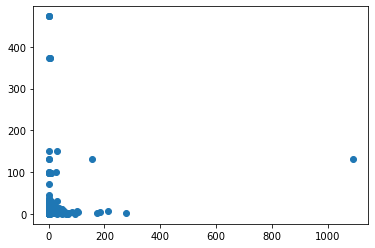

In [21]:
#ajustando os hipermarametros do modelo 3
params = {"max_depth":range(5,20), "max_leaf_nodes":range(50,150,5)}
cv1 = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_distributions=params, scoring='neg_mean_squared_error',cv=10,random_state=random_st)
cv1.fit(X_train3,y_train3)
print(cv1.best_estimator_)
y_predh = cv1.predict(X_valid3)
print("MSE: ",mean_squared_error(y_valid3, y_predh))
print("MAD: ", stats.median_abs_deviation(y_predh))
print("R^2: ", r2_score(y_valid3,y_predh))
plt.scatter(y_valid3,y_predh)
plt.show()

In [22]:
#gerando arquivo .pkl
dump(model3, 'modelo_RF.pkl')

['modelo_RF.pkl']